## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Sensors.csv')
data

Sensor_Value  Tolerance_Value      Output
0            0.7             0.01          pH
1            2.0             0.01          pH
2           10.0             0.01          pH
3            7.0             0.01          pH
4            7.5             0.01          pH
..           ...              ...         ...
70          49.0             3.00  ultrasonic
71          39.0             3.00  ultrasonic
72          59.0             3.00  ultrasonic
73          69.0             3.00  ultrasonic
74          77.0             3.00  ultrasonic

[75 rows x 3 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sensor_Value     75 non-null     float64
 1   Tolerance_Value  75 non-null     float64
 2   Output           75 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [4]:
data.describe()

Sensor_Value  Tolerance_Value
count     75.000000        75.000000
mean      29.416000         1.935733
std       22.657157         1.173883
min        0.000000         0.010000
25%        8.750000         2.000000
50%       26.000000         2.000000
75%       45.000000         3.000000
max       80.000000         3.000000

In [5]:
data['Output'].value_counts()

ultrasonic    31
dht           26
pH            18
Name: Output, dtype: int64

### Correlation 

In [6]:
import seaborn as sns

<AxesSubplot:>

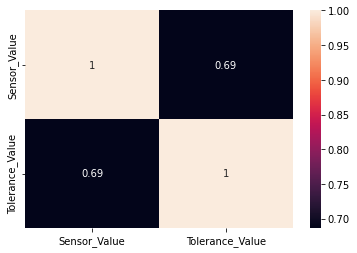

In [7]:
sns.heatmap(data.corr(), annot = True)

In [8]:
x = data.drop(['Output'], axis = 1)
y = data.Output

In [9]:
x.shape

(75, 2)

In [10]:
y.shape

(75,)

### Plotting Graphs

In [11]:
import matplotlib.pyplot as plt

In [12]:
x.Sensor_Value

0      0.7
1      2.0
2     10.0
3      7.0
4      7.5
      ... 
70    49.0
71    39.0
72    59.0
73    69.0
74    77.0
Name: Sensor_Value, Length: 75, dtype: float64

In [13]:
y

0             pH
1             pH
2             pH
3             pH
4             pH
         ...    
70    ultrasonic
71    ultrasonic
72    ultrasonic
73    ultrasonic
74    ultrasonic
Name: Output, Length: 75, dtype: object

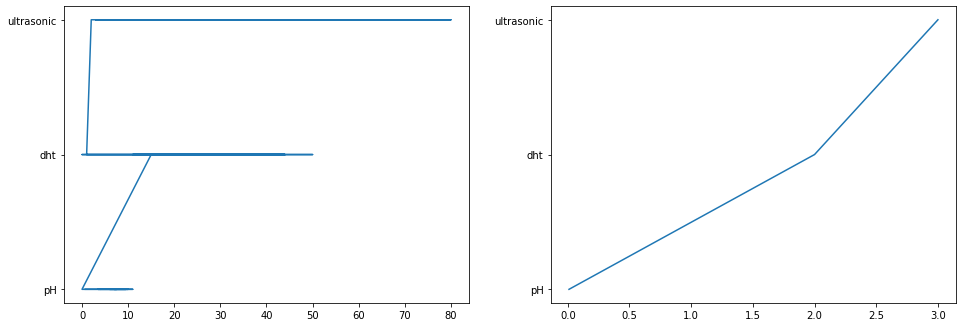

In [14]:
plt.figure(figsize = (16,12))
plt.subplot(2,2,1)
plt.plot(x.Sensor_Value,y)
plt.subplot(2,2,2)
plt.plot(x.Tolerance_Value,y)
plt.show()


## Data Preprocessing 

In [15]:
y = data.iloc[:,-1].values
x = data.iloc[:,0:2].values
y,x.shape

(array(['pH', 'pH', 'pH', 'pH', 'pH', 'pH', 'pH', 'pH', 'pH', 'pH', 'pH',
        'pH', 'pH', 'pH', 'pH', 'pH', 'pH', 'pH', 'dht', 'dht', 'dht',
        'dht', 'dht', 'dht', 'dht', 'dht', 'dht', 'dht', 'dht', 'dht',
        'dht', 'dht', 'dht', 'dht', 'dht', 'dht', 'dht', 'dht', 'dht',
        'dht', 'dht', 'dht', 'dht', 'dht', 'ultrasonic', 'ultrasonic',
        'ultrasonic', 'ultrasonic', 'ultrasonic', 'ultrasonic',
        'ultrasonic', 'ultrasonic', 'ultrasonic', 'ultrasonic',
        'ultrasonic', 'ultrasonic', 'ultrasonic', 'ultrasonic',
        'ultrasonic', 'ultrasonic', 'ultrasonic', 'ultrasonic',
        'ultrasonic', 'ultrasonic', 'ultrasonic', 'ultrasonic',
        'ultrasonic', 'ultrasonic', 'ultrasonic', 'ultrasonic',
        'ultrasonic', 'ultrasonic', 'ultrasonic', 'ultrasonic',
        'ultrasonic'], dtype=object),
 (75, 2))

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
y = le.fit_transform(y)


### Training and Testing Datasets

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x, y)

## Scaling dataset

In [19]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

In [20]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [21]:
x_train_sc,x_test_sc

(array([[-0.96629606, -1.85101488],
        [ 0.12075668, -0.05025453],
        [ 1.29839715,  0.85465017],
        [ 0.70957691,  0.85465017],
        [-0.83041447, -1.85101488],
        [-0.19630037,  0.85465017],
        [ 2.29486216,  0.85465017],
        [-0.64923901,  0.85465017],
        [-0.01512492,  0.85465017],
        [-0.33218196, -0.05025453],
        [-0.06041878, -0.05025453],
        [ 1.4795726 ,  0.85465017],
        [-1.32864698, -1.85101488],
        [ 0.48310759, -0.05025453],
        [-0.55865129,  0.85465017],
        [-1.28335311, -0.05025453],
        [ 0.89075237,  0.85465017],
        [-1.32864698, -0.05025453],
        [-0.78512061, -0.05025453],
        [-1.05688379, -1.85101488],
        [ 1.57016033,  0.85465017],
        [-1.07953072, -1.85101488],
        [ 0.347226  , -0.05025453],
        [-1.17011845, -1.85101488],
        [-0.10571264,  0.85465017],
        [ 0.9813401 ,  0.85465017],
        [-0.83041447, -0.05025453],
        [ 1.02663396,  0.854

In [22]:
y_train,y_test

(array([1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 1,
        0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2,
        0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2]),
 array([0, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2]))

## Applying Machine Learning Algorithms

## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [66]:
lr.score(x_train,y_train)

1.0

In [67]:
lr.score(x_test,y_test)

1.0

In [68]:
lr1 = LogisticRegression()
lr1.fit(x_train_sc,y_train)

LogisticRegression()

In [69]:
lr1.score(x_train_sc,y_train)

1.0

In [70]:
lr1.score(x_test_sc,y_test)

1.0

## Support Vector Machine

In [71]:
from sklearn.svm import LinearSVC
svc = LinearSVC()


In [72]:
svc.fit(x_train,y_train)


c:\users\hebbar\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [73]:
svc.score(x_train,y_train)

0.6428571428571429

In [74]:
svc.score(x_test,y_test)

0.7368421052631579

In [75]:
svc1 = LinearSVC()
svc1.fit(x_train_sc,y_train)

LinearSVC()

In [76]:
svc1.score(x_train_sc,y_train)

1.0

In [77]:
svc1.score(x_test_sc,y_test)

1.0

## K Nearest Neighbour 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [52]:
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [53]:
knn.score(x_train,y_train)

0.6964285714285714

In [54]:
knn.score(x_test,y_test)

0.8947368421052632

In [55]:
knn1 = KNeighborsClassifier()
knn1.fit(x_train_sc,y_train)

KNeighborsClassifier()

In [56]:
knn1.score(x_train_sc,y_train)

1.0

In [57]:
knn1.score(x_test_sc,y_test)

1.0

## Decision Trees

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [79]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
dtc.score(x_train,y_train)

1.0

In [81]:
dtc.score(x_test,y_test)

1.0

In [98]:
dtc1 = DecisionTreeClassifier()
dtc1.fit(x_train_sc,y_train)

DecisionTreeClassifier()

In [99]:
dtc1.score(x_train_sc,y_train)

1.0

In [100]:
dtc1.score(x_test_sc,y_test)

1.0

## Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [101]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [102]:
rfc.score(x_train,y_train)

1.0

In [103]:
rfc.score(x_test,y_test)

1.0

In [104]:
rfc1 = RandomForestClassifier()
rfc1.fit(x_train,y_train)

RandomForestClassifier()

In [105]:
rfc1.score(x_train_sc,y_train)

0.19642857142857142

In [106]:
rfc1.score(x_test_sc,y_test)

0.3684210526315789